In [2]:
#載入所需函示庫

from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 150
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
#pd.options.display.max_rows = 999

以週為單位的multi-regression  
Y個人小考成績；Ｘ是該州前該州進度影片的觀看總時長、暫停次數、平均播放速度

In [3]:
#讀取資料集
df = pd.read_csv('/Users/chihsin1/Documents/stats2_finalProject_data/OR107 grades.csv')

print('Head of dataset:')
display(df.head())

print("Tail of dataset:")
display(df.tail())

Head of dataset:


,student_id,Section,Case Assignment 1 (1579),Case Assignment 2 (1843),Case Assignment 3 (2014),Pre-lecture problems for Lecture 2 (1631),Pre-lecture problems for Lecture 3 (1683),Pre-lecture problems for Lecture 4 (1731),Pre-lecture problems for Lecture 5 (1779),Pre-lecture Problems for Lecture 6 (1811),Pre-lecture Problems for Lecture 7 (1877),Pre-lecture Problems for Lecture 9 (1942),Pre-lecture Problems for Lecture 10 (1990),Pre-lecture Problems for Lecture 11 (2025),Homework 1 (1776),Homework 2 (1928),Homework 3 (2103),Final project proposal (2125),Final project (2126),Final Exam (2231)
0,Points Possible,NaN,100.0,100.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,100.0,100.0,100.0,0.0,0.00,100.0
1,88,107-2 作業研究 Operations Research,72.0,NaN,NaN,NaN,9.0,NaN,8.0,10.0,NaN,NaN,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN
2,89,107-2 作業研究 Operations Research,72.0,82.0,84.0,7.0,9.0,9.0,9.0,8.0,5.0,10.0,5.0,NaN,76.0,85.0,69.0,NaN,92.69,41.0
3,90,107-2 作業研究 Operations Research,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,91,107-2 作業研究 Operations Research,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tail of dataset:


,student_id,Section,Case Assignment 1 (1579),Case Assignment 2 (1843),Case Assignment 3 (2014),Pre-lecture problems for Lecture 2 (1631),Pre-lecture problems for Lecture 3 (1683),Pre-lecture problems for Lecture 4 (1731),Pre-lecture problems for Lecture 5 (1779),Pre-lecture Problems for Lecture 6 (1811),Pre-lecture Problems for Lecture 7 (1877),Pre-lecture Problems for Lecture 9 (1942),Pre-lecture Problems for Lecture 10 (1990),Pre-lecture Problems for Lecture 11 (2025),Homework 1 (1776),Homework 2 (1928),Homework 3 (2103),Final project proposal (2125),Final project (2126),Final Exam (2231)
79,166,107-2 作業研究 Operations Research,69.0,86.0,100.0,10.0,9.0,8.0,10.0,10.0,NaN,10.0,8.0,8.0,100.0,78.0,93.0,NaN,94.76,70.0
80,167,107-2 作業研究 Operations Research,87.0,NaN,NaN,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,168,107-2 作業研究 Operations Research,72.0,90.0,97.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,9.0,98.0,95.0,89.0,NaN,94.61,75.0
82,169,107-2 作業研究 Operations Research,117.0,95.0,100.0,10.0,8.0,10.0,10.0,10.0,8.0,8.0,9.0,10.0,98.0,96.0,85.0,NaN,98.50,82.0
83,170,107-2 作業研究 Operations Research,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['student_id', 'Section', 'Case Assignment 1 (1579)',
       'Case Assignment 2 (1843)', 'Case Assignment 3 (2014)',
       'Pre-lecture problems for Lecture 2 (1631)',
       'Pre-lecture problems for Lecture 3 (1683)',
       'Pre-lecture problems for Lecture 4 (1731)',
       'Pre-lecture problems for Lecture 5 (1779)',
       'Pre-lecture Problems for Lecture 6 (1811)',
       'Pre-lecture Problems for Lecture 7 (1877)',
       'Pre-lecture Problems for Lecture 9 (1942)',
       'Pre-lecture Problems for Lecture 10 (1990)',
       'Pre-lecture Problems for Lecture 11 (2025)', 'Homework 1 (1776)',
       'Homework 2 (1928)', 'Homework 3 (2103)',
       'Final project proposal (2125)', 'Final project (2126)',
       'Final Exam (2231)'],
      dtype='object')

In [5]:
df_grade = df.loc[:,['student_id',
          'Pre-lecture problems for Lecture 2 (1631)',
   'Pre-lecture problems for Lecture 3 (1683)',
       'Pre-lecture problems for Lecture 4 (1731)',
       'Pre-lecture problems for Lecture 5 (1779)',
       'Pre-lecture Problems for Lecture 6 (1811)',
       'Pre-lecture Problems for Lecture 7 (1877)',
       'Pre-lecture Problems for Lecture 9 (1942)',
       'Pre-lecture Problems for Lecture 10 (1990)',
          'Pre-lecture Problems for Lecture 11 (2025)']]

print('Head of dataset:')
display(df_grade.head())

print("Tail of dataset:")
display(df_grade.tail())

Head of dataset:


,student_id,Pre-lecture problems for Lecture 2 (1631),Pre-lecture problems for Lecture 3 (1683),Pre-lecture problems for Lecture 4 (1731),Pre-lecture problems for Lecture 5 (1779),Pre-lecture Problems for Lecture 6 (1811),Pre-lecture Problems for Lecture 7 (1877),Pre-lecture Problems for Lecture 9 (1942),Pre-lecture Problems for Lecture 10 (1990),Pre-lecture Problems for Lecture 11 (2025)
0,Points Possible,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
1,88,NaN,9.0,NaN,8.0,10.0,NaN,NaN,NaN,NaN
2,89,7.0,9.0,9.0,9.0,8.0,5.0,10.0,5.0,NaN
3,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tail of dataset:


,student_id,Pre-lecture problems for Lecture 2 (1631),Pre-lecture problems for Lecture 3 (1683),Pre-lecture problems for Lecture 4 (1731),Pre-lecture problems for Lecture 5 (1779),Pre-lecture Problems for Lecture 6 (1811),Pre-lecture Problems for Lecture 7 (1877),Pre-lecture Problems for Lecture 9 (1942),Pre-lecture Problems for Lecture 10 (1990),Pre-lecture Problems for Lecture 11 (2025)
79,166,10.0,9.0,8.0,10.0,10.0,NaN,10.0,8.0,8.0
80,167,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,168,9.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,9.0
82,169,10.0,8.0,10.0,10.0,10.0,8.0,8.0,9.0,10.0
83,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_grade = df_grade.iloc[1:]
df_grade.set_index('student_id', inplace=True)
print('Head of dataset:')
display(df_grade.head())

Head of dataset:


,Pre-lecture problems for Lecture 2 (1631),Pre-lecture problems for Lecture 3 (1683),Pre-lecture problems for Lecture 4 (1731),Pre-lecture problems for Lecture 5 (1779),Pre-lecture Problems for Lecture 6 (1811),Pre-lecture Problems for Lecture 7 (1877),Pre-lecture Problems for Lecture 9 (1942),Pre-lecture Problems for Lecture 10 (1990),Pre-lecture Problems for Lecture 11 (2025)
student_id,,,,,,,,,
88,NaN,9.0,NaN,8.0,10.0,NaN,NaN,NaN,NaN
89,7.0,9.0,9.0,9.0,8.0,5.0,10.0,5.0,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_grade.columns = ['Lecture 2','Lecture 3','Lecture 4','Lecture 5','Lecture 6','Lecture 7','Lecture 9','Lecture 10','Lecture 11',]
df_grade.head()

,Lecture 2,Lecture 3,Lecture 4,Lecture 5,Lecture 6,Lecture 7,Lecture 9,Lecture 10,Lecture 11
student_id,,,,,,,,,
88,NaN,9.0,NaN,8.0,10.0,NaN,NaN,NaN,NaN
89,7.0,9.0,9.0,9.0,8.0,5.0,10.0,5.0,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_grade = df_grade.fillna(0)
df_grade.head()

,Lecture 2,Lecture 3,Lecture 4,Lecture 5,Lecture 6,Lecture 7,Lecture 9,Lecture 10,Lecture 11
student_id,,,,,,,,,
88,0.0,9.0,0.0,8.0,10.0,0.0,0.0,0.0,0.0
89,7.0,9.0,9.0,9.0,8.0,5.0,10.0,5.0,0.0
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df_grade.columns = [0, 1, 2, 3, 4, 5, 6, 7, 8]
df_grade.head()

,0,1,2,3,4,5,6,7,8
student_id,,,,,,,,,
88,0.0,9.0,0.0,8.0,10.0,0.0,0.0,0.0,0.0
89,7.0,9.0,9.0,9.0,8.0,5.0,10.0,5.0,0.0
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


上面是「個人小考成績」

In [10]:
#讀取資料集
df_time = pd.read_excel('/Users/chihsin1/Downloads/OR107time.xlsx')

print('Head of dataset:')
display(df_time.head())

print("Tail of dataset:")
display(df_time.tail())

Head of dataset:


,0,1,2,3,4,5,6,7,8,9,Total
0,88,1993,3111,2048,0,0,4579,0,0,0,11731
1,89,4775,3686,3155,3871,0,0,2087,717,1198,19489
2,90,0,0,0,0,0,0,0,0,0,0
3,91,0,0,0,0,0,0,0,0,0,0
4,92,0,0,0,0,0,0,0,0,0,0


Tail of dataset:


,0,1,2,3,4,5,6,7,8,9,Total
82,170,0,0,0,0,0,0,0,0,0,0
83,171,0,0,0,0,0,0,0,0,0,0
84,172,0,0,0,0,0,0,0,0,0,0
85,173,0,0,0,0,0,0,0,0,0,0
86,174,0,0,0,0,0,0,0,0,0,0


In [11]:
df_time.set_index(df_time[0], inplace=True)

print('Head of dataset:')
display(df_time.head())


Head of dataset:


,0,1,2,3,4,5,6,7,8,9,Total
0,,,,,,,,,,,
88,88,1993,3111,2048,0,0,4579,0,0,0,11731
89,89,4775,3686,3155,3871,0,0,2087,717,1198,19489
90,90,0,0,0,0,0,0,0,0,0,0
91,91,0,0,0,0,0,0,0,0,0,0
92,92,0,0,0,0,0,0,0,0,0,0


In [12]:
df_time = df_time.drop(columns = 0)
df_time.columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 'Total']
df_time.head()

,0,1,2,3,4,5,6,7,8,Total
0,,,,,,,,,,
88,1993,3111,2048,0,0,4579,0,0,0,11731
89,4775,3686,3155,3871,0,0,2087,717,1198,19489
90,0,0,0,0,0,0,0,0,0,0
91,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0


上面是觀看總時長

In [13]:
#讀取資料集
df_pause = pd.read_excel('/Users/chihsin1/Downloads/OR 107 該週前該週進度影片平均觀看暫停次數.xlsx')

print('Head of dataset:')
display(df_pause.head())

print("Tail of dataset:")
display(df_pause.tail())

Head of dataset:


,0,1,2,3,4,5,6,7,8,9,Total
0,88,17,11,11,0,0,19,0,0,0,58
1,89,34,19,21,20,0,0,7,2,4,107
2,90,0,0,0,0,0,0,0,0,0,0
3,91,0,0,0,0,0,0,0,0,0,0
4,92,0,0,0,0,0,0,0,0,0,0


Tail of dataset:


,0,1,2,3,4,5,6,7,8,9,Total
82,170,0,0,0,0,0,0,0,0,0,0
83,171,0,0,0,0,0,0,0,0,0,0
84,172,0,0,0,0,0,0,0,0,0,0
85,173,0,0,0,0,0,0,0,0,0,0
86,174,0,0,0,0,0,0,0,0,0,0


In [14]:
df_pause.set_index(0, inplace=True)

print('Head of dataset:')
display(df_pause.head())

Head of dataset:


,1,2,3,4,5,6,7,8,9,Total
0,,,,,,,,,,
88,17,11,11,0,0,19,0,0,0,58
89,34,19,21,20,0,0,7,2,4,107
90,0,0,0,0,0,0,0,0,0,0
91,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0


In [15]:
df_pause.columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 'Total']
df_pause.head()


,0,1,2,3,4,5,6,7,8,Total
0,,,,,,,,,,
88,17,11,11,0,0,19,0,0,0,58
89,34,19,21,20,0,0,7,2,4,107
90,0,0,0,0,0,0,0,0,0,0
91,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0


上面是暫停次數

In [16]:
#讀取資料集
df_rate = pd.read_excel('/Users/chihsin1/Downloads/average_playback_rate(weekly)_OR 107.xlsx')

print('Head of dataset:')
display(df_rate.head())

print("Tail of dataset:")
display(df_rate.tail())

Head of dataset:


,0,1,2,3,4,5,6,7,8,9
0,88,1.030105,1.293796,1.554199,0.000000,0.0,0.94038,0.000000,0.000000,0.000000
1,89,1.214450,1.275638,1.451664,1.331439,0.0,0.00000,1.472448,1.447699,1.321369
2,90,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
3,91,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
4,92,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000


Tail of dataset:


,0,1,2,3,4,5,6,7,8,9
82,170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84,172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df_rate.set_index(0, inplace=True)

print('Head of dataset:')
display(df_rate.head())

Head of dataset:


,1,2,3,4,5,6,7,8,9
0,,,,,,,,,
88,1.030105,1.293796,1.554199,0.000000,0.0,0.94038,0.000000,0.000000,0.000000
89,1.214450,1.275638,1.451664,1.331439,0.0,0.00000,1.472448,1.447699,1.321369
90,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
91,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
92,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000


In [18]:
df_rate.columns = [0, 1, 2, 3, 4, 5, 6, 7, 8]
df_rate.head()

,0,1,2,3,4,5,6,7,8
0,,,,,,,,,
88,1.030105,1.293796,1.554199,0.000000,0.0,0.94038,0.000000,0.000000,0.000000
89,1.214450,1.275638,1.451664,1.331439,0.0,0.00000,1.472448,1.447699,1.321369
90,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
91,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
92,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000


上面是平均播放速度  
week資料  
standardize independent & replace time by time2 & log Grade already  
drop grade == 0, rate != 0

In [19]:
def scatter(week):
    y = week['Grade'].values
    xnames = ['time_sd2',"pause_sd",'rate_sd']
    print("Scatter Plot:")
    for aname in xnames:
        x = week[aname].values

        _ = plt.plot(x, y, 'o', color = 'b')
        plt.xlabel(aname)
        plt.ylabel('Grade')
        plt.show()

In [20]:
def scatter_org(week):
    y = week['Grade'].values
    xnames = ['time',"pause",'rate']
    print("Scatter Plot:")
    for aname in xnames:
        x = week[aname].values

        _ = plt.plot(x, y, 'o', color = 'b')
        plt.xlabel(aname)
        plt.ylabel('Grade')
        plt.show()

In [21]:
def cor(week):
    print("Correlation coefficients:")
    corr1 = week.corr()
    _ = sns.heatmap(corr1, annot=True)

In [22]:
def residual(week_result1):
    print("\n Residual Analysis:")
    for i in range(2):
        if(i == 0):
            hist = plt.hist(week_result1.resid_pearson, bins = 'auto')
        else:
            fig = sm.qqplot(week_result1.resid_pearson, stats.norm, fit=True, line='45')

In [23]:
def outlier(week_result1):
    st, data, ss2 = sso.summary_table(week_result1, alpha=0.05)
    print("Columns in data are: %s" % ss2)

    #Predicted value
    x = data[:, 2]
    #Studentized Residual
    y = data[:, 10]

    plt.plot(x, y, 'o', color = 'gray')
    plt.axhline(y=2, color = 'red', lw = 0.8)
    plt.axhline(y=-2, color = 'red', lw = 0.8)
    plt.show()
    return y


In [24]:
def cooks(week_result1):
    st, data, ss2 = sso.summary_table(week_result1, alpha=0.05)
 #   print("Columns in data are: %s" % ss2)
    x = data[:, 2]
    cook_dist = data[:, 11]
    plt.plot(x, cook_dist, 'o', color = 'gray')
    plt.title("Cook's Distance")
    plt.show()
    return cook_dist

In [25]:
def show(index):  
    Grade = df_grade.iloc[:,index].values
    size = Grade.shape[0]
    time = df_time.iloc[:size,index]
    pause = df_pause.iloc[:size,index]
    rate = df_rate.iloc[:size,index]
    #df_grade
    week = pd.concat([time,pause,rate],axis=1)
    
    week['Grade']=Grade
    #week['Grade'] = np.log(week['Grade']+1)
    week.columns = ['time','pause','rate','Grade']
    #take off rate=0
 #   week = week[week['Grade']!= 0]
    g = week['Grade']==0 
    r = week['rate']!=0
    c = week['rate']!=0
    for i in range(g.shape[0]):
        G = g[i+88]
        R = r[i+88]
        c[i+88] = (G and R)
    bye = week[c]
    week = week.drop(bye.index)
  
    
    m = week['time'].mean()
    std = week['time'].std()
    week['time'] = (week['time'] - m) / std
    week['time'] = week['time']* week['time']

    m = week['pause'].mean()
    std = week['pause'].std()
    week['pause'] = (week['pause'] - m) / std

    m = week['rate'].mean()
    std = week['rate'].std()
    week['rate'] = (week['rate'] - m) / std
    
    #week.columns = ['time_sd2','pause_sd','rate_sd','Grade_log']
    week.columns = ['time_sd2','pause_sd','rate_sd','Grade']
    week.head()
    
    #summary statistic
    display(week.describe())
    #plot
    scatter(week)
    
    return week

In [26]:
def result(week):
    week = week.dropna()
    week_result1 = smf.ols('Grade ~ time_sd2 + pause_sd + rate_sd', data=week).fit()
    # Inspect the results
    print("Model Result:")
    print(week_result1.summary())
    return week_result1

In [27]:
def result_log(week):
    week = week.dropna()
    week_result1 = smf.ols('Grade ~ time_log + pause_log + rate_log', data=week).fit()
    # Inspect the results
    print("Model Result:")
    print(week_result1.summary())
    return week_result1

In [28]:
def show_org(index):  
    Grade = df_grade.iloc[:,index].values
    size = Grade.shape[0]
    time = df_time.iloc[:size,index]
    pause = df_pause.iloc[:size,index]
    rate = df_rate.iloc[:size,index]
    #df_grade
    week = pd.concat([time,pause,rate],axis=1)
    
    week['Grade']=Grade
    #week['Grade'] = np.log(week['Grade']+1)
    week.columns = ['time','pause','rate','Grade']
    #take off rate=0
 #   week = week[week['Grade']!= 0]
    g = week['Grade']==0 
    r = week['rate']!=0
    c = week['rate']!=0
    for i in range(g.shape[0]):
        G = g[i+88]
        R = r[i+88]
        c[i+88] = (G and R)
    bye = week[c]
    week = week.drop(bye.index)
    
    #summary statistic
    display(week.describe())
    #plot
    scatter_org(week)
    
    return week

In [29]:
def show_log(index):  
    Grade = df_grade.iloc[:,index].values
    size = Grade.shape[0]
    time = df_time.iloc[:size,index]
    pause = df_pause.iloc[:size,index]
    rate = df_rate.iloc[:size,index]
    #df_grade
    week = pd.concat([time,pause,rate],axis=1)
    
    week['Grade']=Grade
    #week['Grade'] = np.log(week['Grade']+1)
    week.columns = ['time','pause','rate','Grade']
    #take off rate=0
 #   week = week[week['Grade']!= 0]
    g = week['Grade']==0 
    r = week['rate']!=0
    c = week['rate']!=0
    for i in range(g.shape[0]):
        G = g[i+88]
        R = r[i+88]
        c[i+88] = (G and R)
    bye = week[c]
    week = week.drop(bye.index)
  
    
    week['time_log'] = np.log(week['time'] + 1)
    week['pause_log'] = np.log(week['pause'] + 1)
    week['rate_log'] = np.log(week['rate'] + 1)

    week.head()
    
    #summary statistic
    display(week.describe())
    #plot
    scatter_log(week)
    
    return week

In [30]:
def scatter_log(week):
    y = week['Grade'].values
    xnames = ['time_log',"pause_log",'rate_log']
    print("Scatter Plot:")
    for aname in xnames:
        x = week[aname].values

        _ = plt.plot(x, y, 'o', color = 'b')
        plt.xlabel(aname)
        plt.ylabel('Grade')
        plt.show()

In [31]:
def all(index):
    print("Week ", index)
    week = show(index)
    #week = week.drop(columns = ['time', 'pause', 'rate'])
    cor(week)
    re = result(week)
    residual(re)
    stat, p = stats.shapiro(re.resid_pearson)
    print('Shapiro Statistics = %.3f, p = %.3f' % (stat, p))
    y = outlier(re)
    display(week[y >= 2])
    display(week[y <= -2])
    cook = cooks(re)
    display(week[cook>=1])

Week  0


,time_sd2,pause_sd,rate_sd,Grade
count,76.000000,7.600000e+01,7.600000e+01,76.000000
mean,0.986842,2.337312e-17,-3.535184e-16,6.486842
std,1.836696,1.000000e+00,1.000000e+00,4.425663
min,0.000124,-6.969067e-01,-1.185508e+00,0.000000
25%,0.427128,-6.969067e-01,-1.185508e+00,0.000000
50%,0.813243,-3.461457e-01,5.378573e-01,9.000000
75%,0.813243,2.443019e-01,7.613015e-01,10.000000
max,16.141562,4.494356e+00,1.570373e+00,10.000000


Scatter Plot:


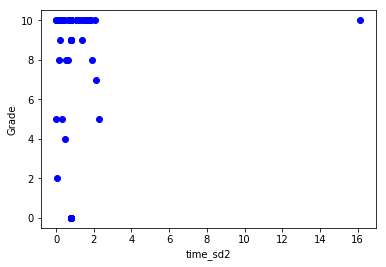

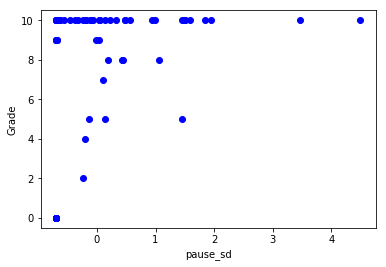

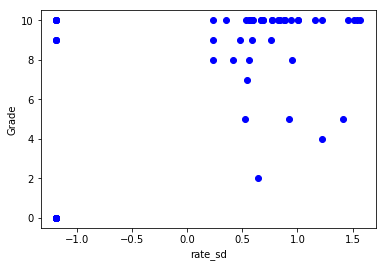

Correlation coefficients:
Model Result:
                            OLS Regression Results                            
Dep. Variable:                  Grade   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     22.87
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           1.67e-10
Time:                        12:01:25   Log-Likelihood:                -194.95
No. Observations:                  76   AIC:                             397.9
Df Residuals:                      72   BIC:                             407.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

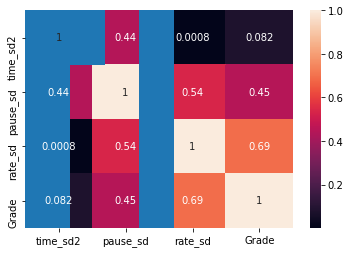

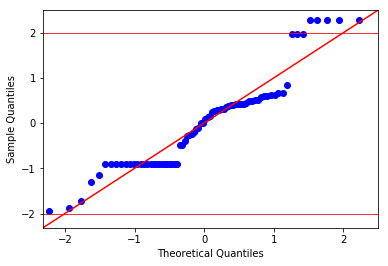

,time_sd2,pause_sd,rate_sd,Grade
0,,,,
115,0.813243,-0.696907,-1.185508,10.0
123,0.813243,-0.696907,-1.185508,10.0
146,0.813243,-0.696907,-1.185508,10.0
159,0.813243,-0.696907,-1.185508,10.0
161,0.813243,-0.696907,-1.185508,10.0


,time_sd2,pause_sd,rate_sd,Grade
0,,,,


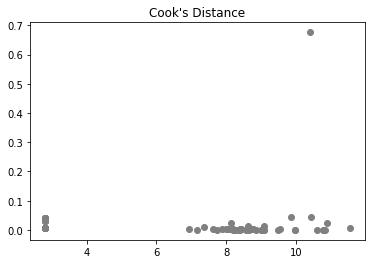

,time_sd2,pause_sd,rate_sd,Grade
0,,,,


In [32]:
all(0)

Week  1


,time_sd2,pause_sd,rate_sd,Grade
count,78.000000,7.800000e+01,7.800000e+01,78.000000
mean,0.987179,1.423363e-18,1.708035e-17,6.576923
std,1.063912,1.000000e+00,1.000000e+00,4.268639
min,0.026356,-5.593509e-01,-1.286263e+00,0.000000
25%,0.424072,-5.593509e-01,-1.286263e+00,0.000000
50%,0.972154,-4.340820e-01,3.994448e-01,9.000000
75%,0.972154,9.681955e-02,7.877244e-01,10.000000
max,8.223164,5.465487e+00,1.495715e+00,10.000000


Scatter Plot:


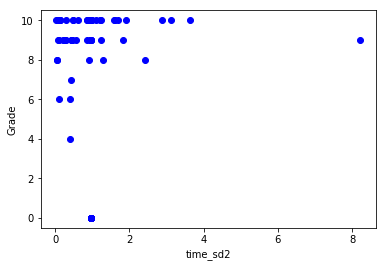

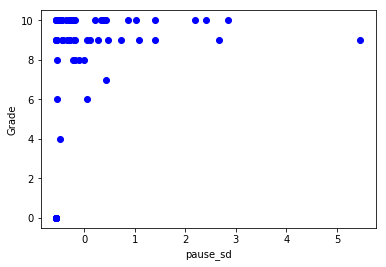

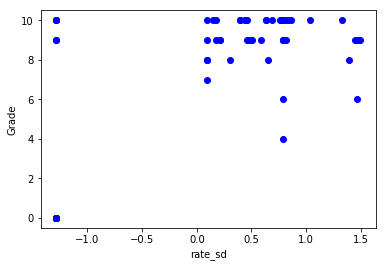

Correlation coefficients:
Model Result:
                            OLS Regression Results                            
Dep. Variable:                  Grade   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     38.30
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           4.75e-15
Time:                        12:01:43   Log-Likelihood:                -186.82
No. Observations:                  78   AIC:                             381.6
Df Residuals:                      74   BIC:                             391.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

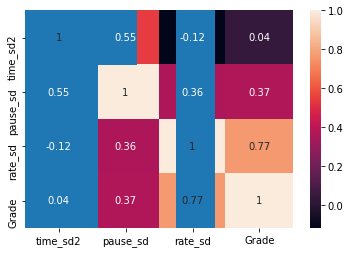

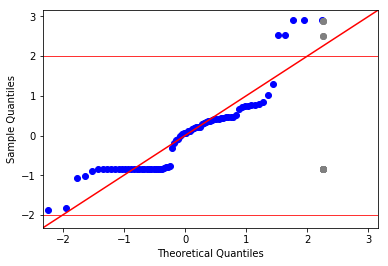

,time_sd2,pause_sd,rate_sd,Grade
0,,,,
97,0.972154,-0.559351,-1.286263,10.0
98,0.972154,-0.559351,-1.286263,10.0
146,0.972154,-0.559351,-1.286263,9.0
161,0.972154,-0.559351,-1.286263,9.0
163,0.972154,-0.559351,-1.286263,10.0


,time_sd2,pause_sd,rate_sd,Grade
0,,,,


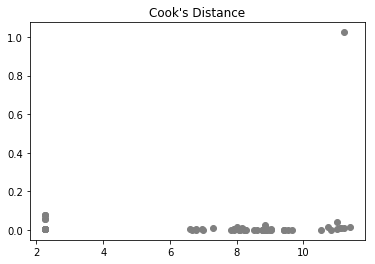

,time_sd2,pause_sd,rate_sd,Grade
0,,,,
120,8.223164,5.465487,0.211251,9.0


In [33]:
all(1)

Week  2


,time_sd2,pause_sd,rate_sd,Grade
count,78.000000,7.800000e+01,7.800000e+01,78.000000
mean,0.987179,-1.708035e-17,2.661689e-16,5.230769
std,0.895478,1.000000e+00,1.000000e+00,4.130731
min,0.032027,-5.597533e-01,-9.338884e-01,0.000000
25%,0.671217,-5.597533e-01,-9.338884e-01,0.000000
50%,0.671217,-5.597533e-01,-9.338884e-01,7.000000
75%,0.947111,2.067051e-01,9.637608e-01,9.000000
max,4.608023,4.285359e+00,1.621640e+00,10.000000


Scatter Plot:


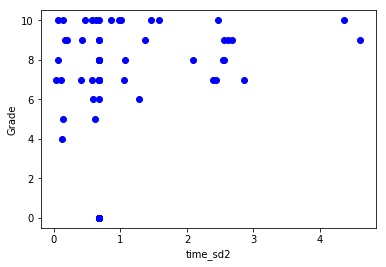

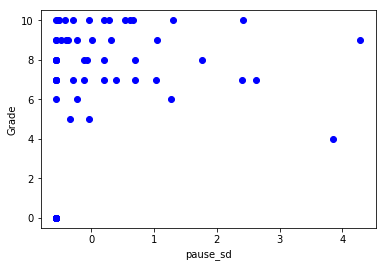

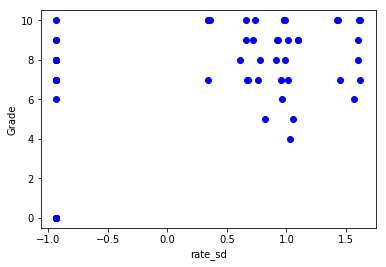

Correlation coefficients:
Model Result:
                            OLS Regression Results                            
Dep. Variable:                  Grade   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     24.88
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           3.09e-11
Time:                        12:01:58   Log-Likelihood:                -193.61
No. Observations:                  78   AIC:                             395.2
Df Residuals:                      74   BIC:                             404.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

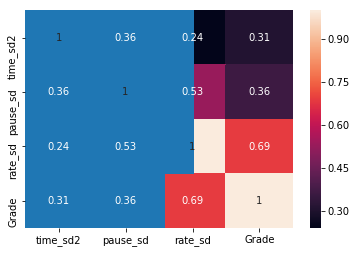

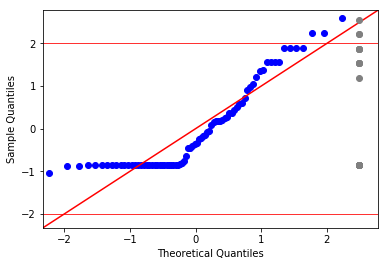

,time_sd2,pause_sd,rate_sd,Grade
0,,,,
117,0.671217,-0.559753,-0.933888,10.0
161,0.671217,-0.559753,-0.933888,9.0
163,0.671217,-0.559753,-0.933888,9.0


,time_sd2,pause_sd,rate_sd,Grade
0,,,,


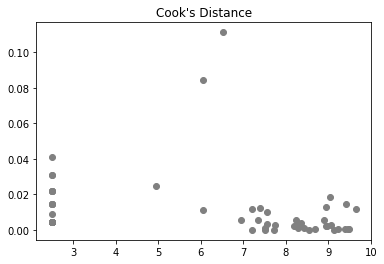

,time_sd2,pause_sd,rate_sd,Grade
0,,,,


In [34]:
all(2)

Week  3


,time_sd2,pause_sd,rate_sd,Grade
count,83.000000,8.300000e+01,8.300000e+01,83.000000
mean,0.987952,1.471380e-17,-2.541474e-16,5.578313
std,0.819599,1.000000e+00,1.000000e+00,4.765528
min,0.007339,-4.794304e-01,-9.261745e-01,0.000000
25%,0.717933,-4.794304e-01,-9.261745e-01,0.000000
50%,0.717933,-4.794304e-01,-9.261745e-01,9.000000
75%,1.071351,7.212527e-02,1.023290e+00,10.000000
max,4.930023,5.816376e+00,1.689864e+00,10.000000


Scatter Plot:


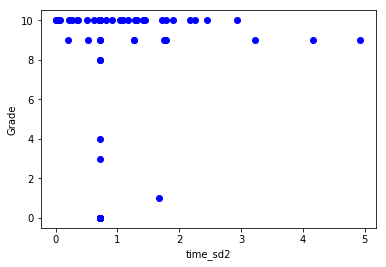

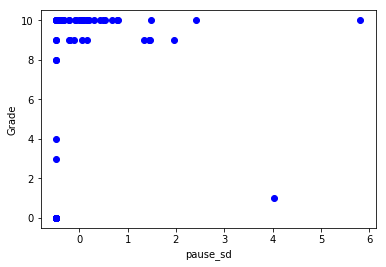

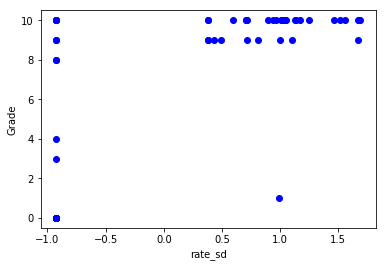

Correlation coefficients:
Model Result:
                            OLS Regression Results                            
Dep. Variable:                  Grade   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     46.33
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           2.23e-17
Time:                        12:02:10   Log-Likelihood:                -204.74
No. Observations:                  83   AIC:                             417.5
Df Residuals:                      79   BIC:                             427.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

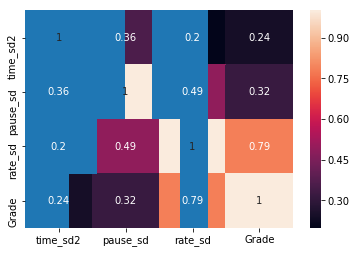

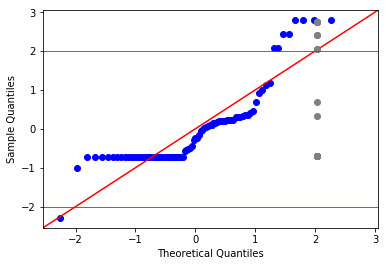

,time_sd2,pause_sd,rate_sd,Grade
0,,,,
88,0.717933,-0.47943,-0.926175,8.0
98,0.717933,-0.47943,-0.926175,9.0
100,0.717933,-0.47943,-0.926175,10.0
117,0.717933,-0.47943,-0.926175,9.0
129,0.717933,-0.47943,-0.926175,10.0
154,0.717933,-0.47943,-0.926175,10.0
163,0.717933,-0.47943,-0.926175,8.0
166,0.717933,-0.47943,-0.926175,10.0


,time_sd2,pause_sd,rate_sd,Grade
0,,,,
140,1.667534,4.027183,0.987024,1.0


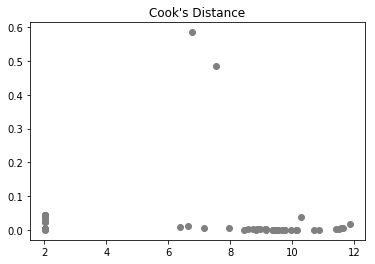

,time_sd2,pause_sd,rate_sd,Grade
0,,,,


In [35]:
all(3)

Week  4


,time_sd2,pause_sd,rate_sd,Grade
count,81.000000,8.100000e+01,8.100000e+01,81.000000
mean,0.987654,-5.482583e-17,-7.127358e-17,6.222222
std,0.943991,1.000000e+00,1.000000e+00,4.724934
min,0.000611,-5.084323e-01,-9.031412e-01,0.000000
25%,0.605027,-5.084323e-01,-9.031412e-01,0.000000
50%,0.605027,-5.084323e-01,-9.031412e-01,10.000000
75%,0.937953,3.196872e-01,9.676994e-01,10.000000
max,5.220282,4.778792e+00,1.605474e+00,10.000000


Scatter Plot:


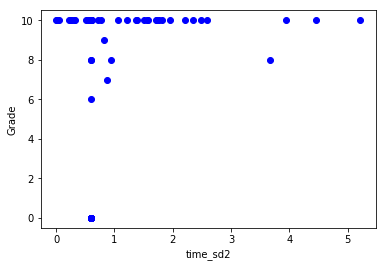

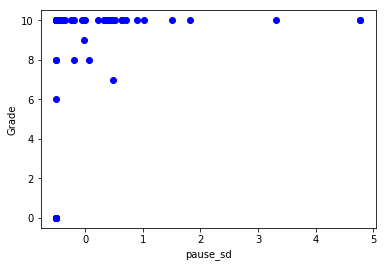

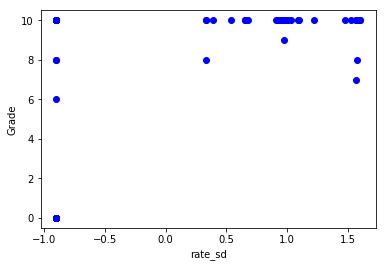

Correlation coefficients:
Model Result:
                            OLS Regression Results                            
Dep. Variable:                  Grade   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     23.89
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           4.97e-11
Time:                        12:02:20   Log-Likelihood:                -213.57
No. Observations:                  81   AIC:                             435.1
Df Residuals:                      77   BIC:                             444.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

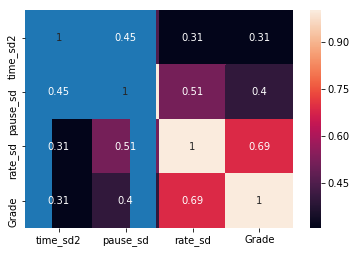

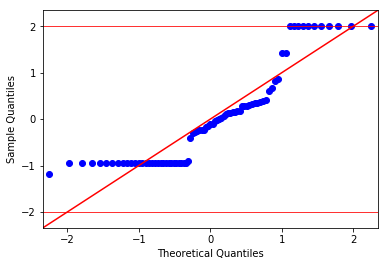

,time_sd2,pause_sd,rate_sd,Grade
0,,,,


,time_sd2,pause_sd,rate_sd,Grade
0,,,,


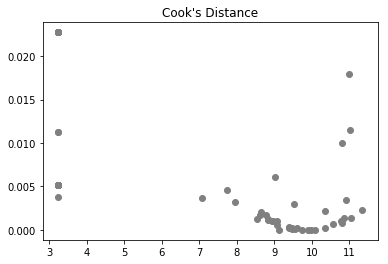

,time_sd2,pause_sd,rate_sd,Grade
0,,,,


In [36]:
all(4)

Week  5


,time_sd2,pause_sd,rate_sd,Grade
count,79.000000,7.900000e+01,7.900000e+01,79.000000
mean,0.987342,6.745659e-17,-7.729401e-17,4.405063
std,1.191711,1.000000e+00,1.000000e+00,4.219974
min,0.005239,-4.192348e-01,-7.340386e-01,0.000000
25%,0.437135,-4.192348e-01,-7.340386e-01,0.000000
50%,0.437135,-4.192348e-01,-7.340386e-01,5.000000
75%,0.945922,-4.722446e-02,1.137923e+00,9.000000
max,6.514377,5.022745e+00,1.938428e+00,10.000000


Scatter Plot:


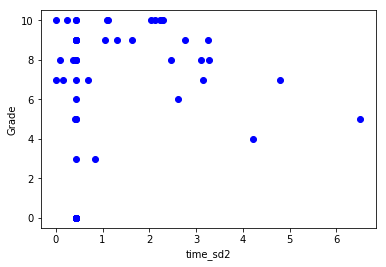

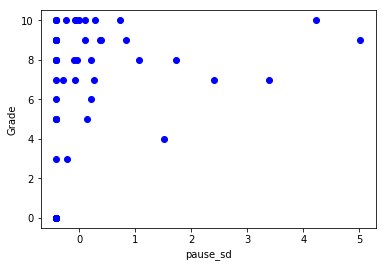

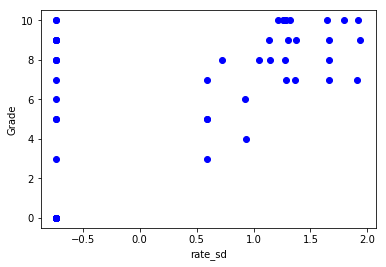

Correlation coefficients:
Model Result:
                            OLS Regression Results                            
Dep. Variable:                  Grade   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     21.43
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           3.98e-10
Time:                        12:02:31   Log-Likelihood:                -200.89
No. Observations:                  79   AIC:                             409.8
Df Residuals:                      75   BIC:                             419.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

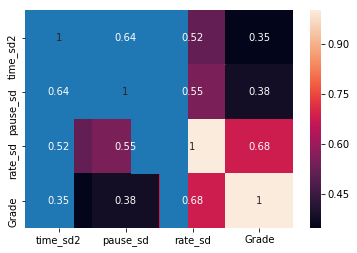

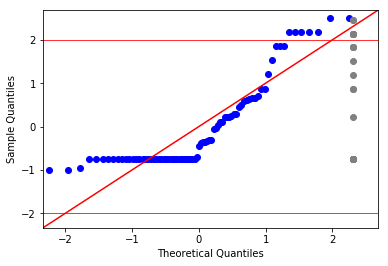

,time_sd2,pause_sd,rate_sd,Grade
0,,,,
136,0.437135,-0.419235,-0.734039,9.0
147,0.437135,-0.419235,-0.734039,10.0
150,0.437135,-0.419235,-0.734039,9.0
154,0.437135,-0.419235,-0.734039,9.0
161,0.437135,-0.419235,-0.734039,9.0
163,0.437135,-0.419235,-0.734039,9.0
168,0.437135,-0.419235,-0.734039,10.0


,time_sd2,pause_sd,rate_sd,Grade
0,,,,


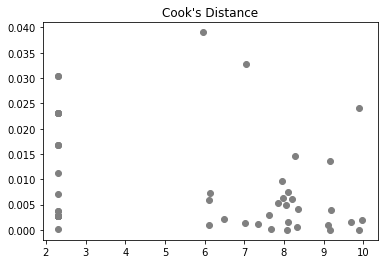

,time_sd2,pause_sd,rate_sd,Grade
0,,,,


In [37]:
all(5)

Week  6


,time_sd2,pause_sd,rate_sd,Grade
count,79.000000,7.900000e+01,7.900000e+01,79.000000
mean,0.987342,4.918710e-17,8.994212e-17,5.468354
std,0.860739,1.000000e+00,1.000000e+00,4.703614
min,0.004944,-5.502605e-01,-1.019649e+00,0.000000
25%,0.715153,-5.502605e-01,-1.019649e+00,0.000000
50%,0.722033,-5.338193e-01,2.600183e-01,8.000000
75%,0.777877,1.813737e-01,9.193405e-01,10.000000
max,4.484737,4.760253e+00,1.612208e+00,10.000000


Scatter Plot:


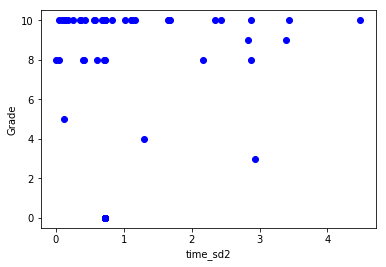

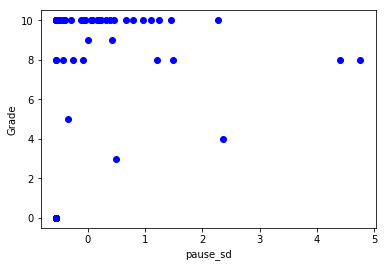

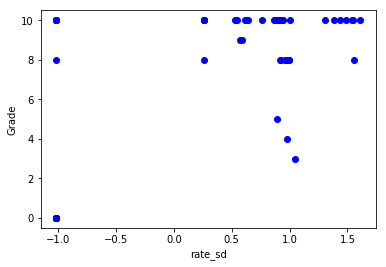

Correlation coefficients:
Model Result:
                            OLS Regression Results                            
Dep. Variable:                  Grade   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     47.97
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           2.05e-17
Time:                        12:02:48   Log-Likelihood:                -191.60
No. Observations:                  79   AIC:                             391.2
Df Residuals:                      75   BIC:                             400.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

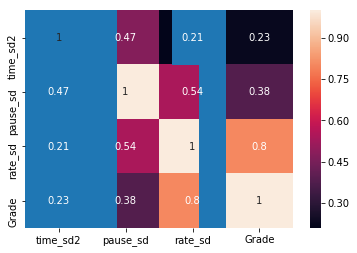

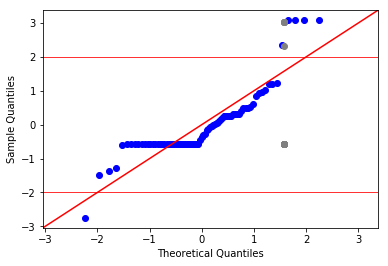

,time_sd2,pause_sd,rate_sd,Grade
0,,,,
133,0.722033,-0.550261,-1.019649,8.0
136,0.722033,-0.550261,-1.019649,10.0
146,0.722033,-0.550261,-1.019649,10.0
161,0.722033,-0.550261,-1.019649,10.0
166,0.722033,-0.550261,-1.019649,10.0


,time_sd2,pause_sd,rate_sd,Grade
0,,,,
151,2.933654,0.501977,1.046824,3.0


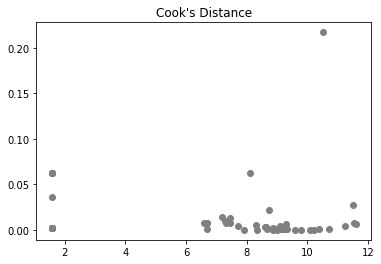

,time_sd2,pause_sd,rate_sd,Grade
0,,,,


In [38]:
all(6)

Week  7


,time_sd2,pause_sd,rate_sd,Grade
count,83.000000,8.300000e+01,8.300000e+01,83.000000
mean,0.987952,-2.742117e-17,-1.471380e-16,4.361446
std,1.070271,1.000000e+00,1.000000e+00,4.200982
min,0.000059,-4.755412e-01,-9.080647e-01,0.000000
25%,0.639429,-4.755412e-01,-9.080647e-01,0.000000
50%,0.639429,-4.755412e-01,-9.080647e-01,6.000000
75%,0.795981,1.375533e-02,9.671281e-01,9.000000
max,5.941813,4.781260e+00,1.617317e+00,10.000000


Scatter Plot:


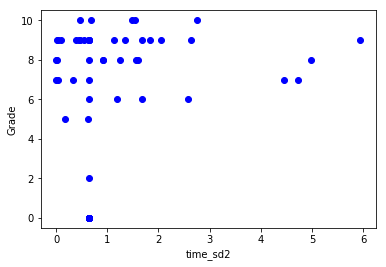

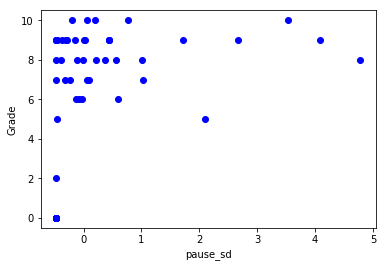

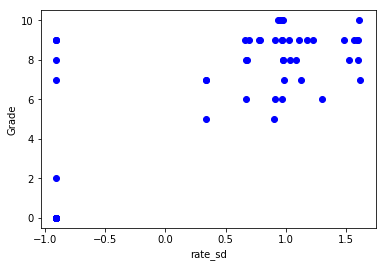

Correlation coefficients:
Model Result:
                            OLS Regression Results                            
Dep. Variable:                  Grade   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     69.96
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           3.51e-22
Time:                        12:03:05   Log-Likelihood:                -182.59
No. Observations:                  83   AIC:                             373.2
Df Residuals:                      79   BIC:                             382.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

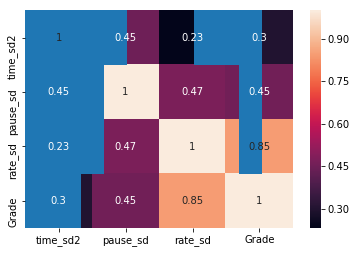

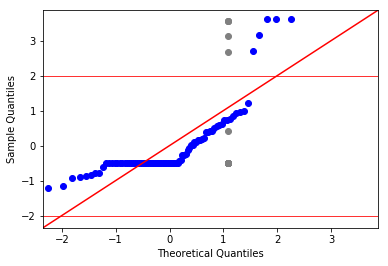

,time_sd2,pause_sd,rate_sd,Grade
0,,,,
97,0.639429,-0.475541,-0.908065,9.0
103,0.639429,-0.475541,-0.908065,9.0
146,0.639429,-0.475541,-0.908065,7.0
154,0.639429,-0.475541,-0.908065,9.0
166,0.639429,-0.475541,-0.908065,8.0


,time_sd2,pause_sd,rate_sd,Grade
0,,,,


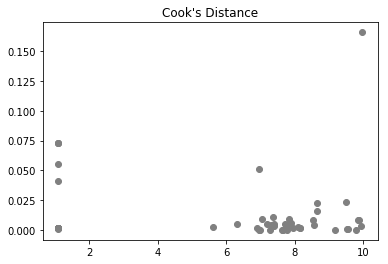

,time_sd2,pause_sd,rate_sd,Grade
0,,,,


In [39]:
all(7)

Week  8


,time_sd2,pause_sd,rate_sd,Grade
count,81.000000,8.100000e+01,8.100000e+01,81.000000
mean,0.987654,3.495147e-17,-5.071389e-17,4.901235
std,1.254675,1.000000e+00,1.000000e+00,4.810418
min,0.000216,-3.960625e-01,-8.800784e-01,0.000000
25%,0.651269,-3.960625e-01,-8.800784e-01,0.000000
50%,0.651269,-3.960625e-01,-8.800784e-01,6.000000
75%,0.765850,-6.508618e-02,9.735735e-01,10.000000
max,9.713083,6.128900e+00,1.618998e+00,10.000000


Scatter Plot:


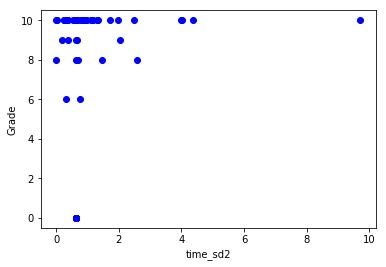

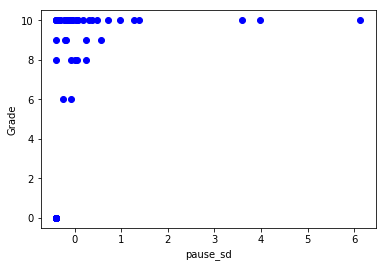

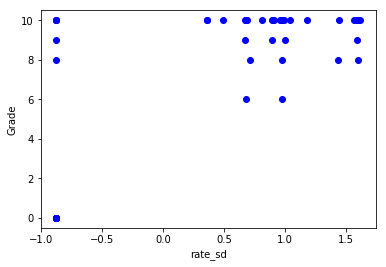

Correlation coefficients:
Model Result:
                            OLS Regression Results                            
Dep. Variable:                  Grade   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     73.27
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           1.68e-22
Time:                        12:03:15   Log-Likelihood:                -187.02
No. Observations:                  81   AIC:                             382.0
Df Residuals:                      77   BIC:                             391.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

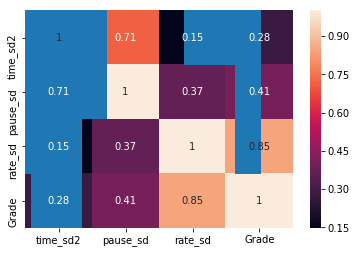

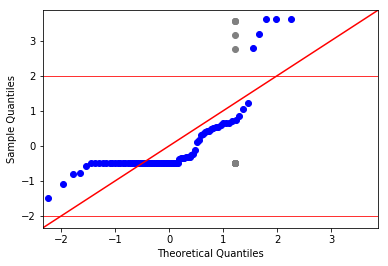

,time_sd2,pause_sd,rate_sd,Grade
0,,,,
97,0.651269,-0.396063,-0.880078,10.0
133,0.651269,-0.396063,-0.880078,10.0
154,0.651269,-0.396063,-0.880078,10.0
166,0.651269,-0.396063,-0.880078,8.0
168,0.651269,-0.396063,-0.880078,9.0


,time_sd2,pause_sd,rate_sd,Grade
0,,,,


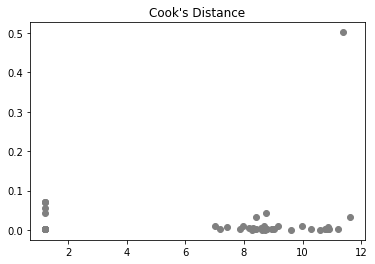

,time_sd2,pause_sd,rate_sd,Grade
0,,,,


In [40]:
all(8)

,time_sd2,pause_sd,rate_sd,Grade
count,83.000000,8.300000e+01,8.300000e+01,83.000000
mean,0.987952,-2.742117e-17,-1.471380e-16,4.361446
std,1.070271,1.000000e+00,1.000000e+00,4.200982
min,0.000059,-4.755412e-01,-9.080647e-01,0.000000
25%,0.639429,-4.755412e-01,-9.080647e-01,0.000000
50%,0.639429,-4.755412e-01,-9.080647e-01,6.000000
75%,0.795981,1.375533e-02,9.671281e-01,9.000000
max,5.941813,4.781260e+00,1.617317e+00,10.000000


Scatter Plot:


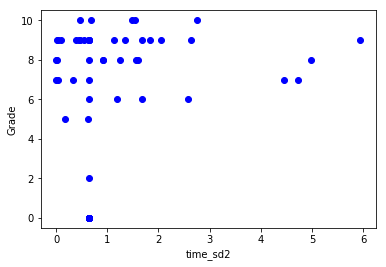

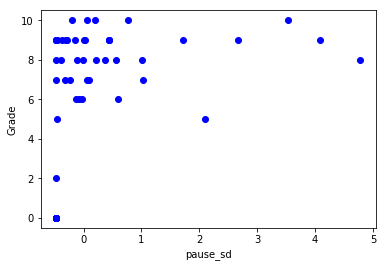

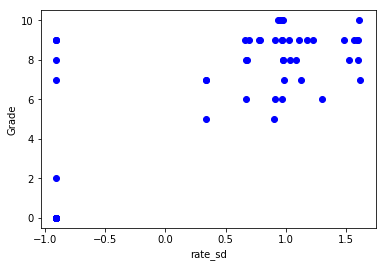

In [44]:
week7 = show(7)

Correlation coefficients:


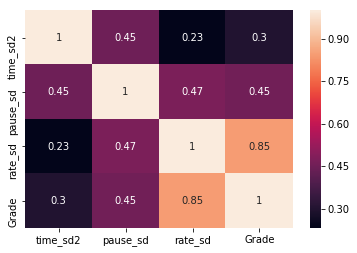

In [45]:
cor(week7)

In [46]:
re7 = result(week7)

Model Result:
                            OLS Regression Results                            
Dep. Variable:                  Grade   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     69.96
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           3.51e-22
Time:                        12:12:52   Log-Likelihood:                -182.59
No. Observations:                  83   AIC:                             373.2
Df Residuals:                      79   BIC:                             382.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9754      0.354     1


 Residual Analysis:


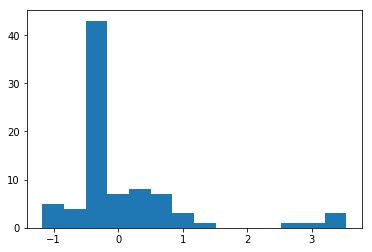

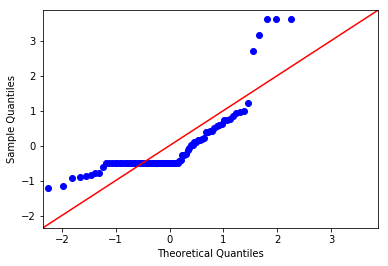

In [47]:
residual(re7)

In [48]:
stat, p = stats.shapiro(re7.resid_pearson)
print('Shapiro Statistics = %.3f, p = %.3f' % (stat, p))

Shapiro Statistics = 0.697, p = 0.000


Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


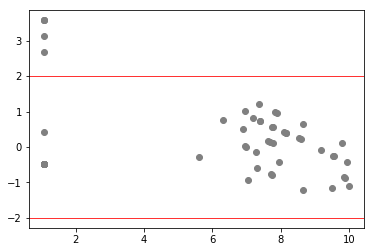

,time_sd2,pause_sd,rate_sd,Grade
0,,,,
97,0.639429,-0.475541,-0.908065,9.0
103,0.639429,-0.475541,-0.908065,9.0
146,0.639429,-0.475541,-0.908065,7.0
154,0.639429,-0.475541,-0.908065,9.0
166,0.639429,-0.475541,-0.908065,8.0


,time_sd2,pause_sd,rate_sd,Grade
0,,,,


In [49]:
y = outlier(re7)
display(week7[y >= 2])
display(week7[y <= -2])

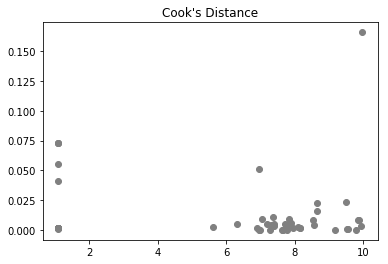

,time,pause,rate,Grade,time_log,pause_log,rate_log
0,,,,,,,


In [50]:
cook = cooks(re7)
display(week8[cook>=1])